In [42]:
import pandas as pd
from textblob import TextBlob

In [44]:
# Load the dataset
file_path = r"C:\Users\vaibh\Downloads\sentimentdataset.csv"
data = pd.read_csv(file_path)

# Check the first few rows to understand the structure
print("Dataset Loaded Successfully!")
print(data.head())

Dataset Loaded Successfully!
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     H

In [46]:
# Function to clean the text data
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove special characters, numbers, and punctuations
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply the cleaning function
data['Cleaned_Text'] = data['Text'].apply(clean_text)
print("Text data cleaned!")

# Display a preview
print(data[['Text', 'Cleaned_Text']].head())


Text data cleaned!
                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                                        Cleaned_Text  
0   enjoying a beautiful day at the park         ...  
1   traffic was terrible this morning            ...  
2   just finished an amazing workout                  
3   excited about the upcoming weekend getaway   ...  
4   trying out a new recipe for dinner tonight   ...  


In [48]:
# Calculate sentiment polarity
data['Sentiment_Polarity'] = data['Cleaned_Text'].apply(analyze_sentiment)

# Categorize the sentiment
data['Sentiment_Category'] = data['Sentiment_Polarity'].apply(categorize_sentiment)

print("Sentiment analysis performed!")
print(data[['Cleaned_Text', 'Sentiment_Polarity', 'Sentiment_Category']].head())

Sentiment analysis performed!
                                        Cleaned_Text  Sentiment_Polarity  \
0   enjoying a beautiful day at the park         ...            0.675000   
1   traffic was terrible this morning            ...           -1.000000   
2   just finished an amazing workout                            0.600000   
3   excited about the upcoming weekend getaway   ...            0.375000   
4   trying out a new recipe for dinner tonight   ...            0.136364   

  Sentiment_Category  
0           Positive  
1           Negative  
2           Positive  
3           Positive  
4           Positive  


In [56]:
# Save the results to a file
output_file = "sentiment_analysis_results_cleaned.csv"
data.to_csv(output_file, index=False)

print(f"Results saved to '{output_file}'.")


Results saved to 'sentiment_analysis_results_cleaned.csv'.


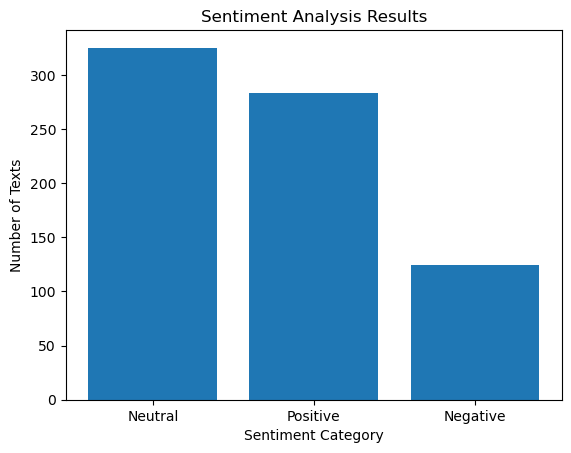

In [58]:
import matplotlib.pyplot as plt

# Count the number of each sentiment category
sentiment_counts = data['Sentiment_Category'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Texts")
plt.show()